# Data Exploration
In this notebook we examine a few things about the dataset, in order to decide how to proceed further.

In [7]:
import preprocessing  # Our preprocessing script
training_data = preprocessing.load_training_data()
print(len(training_data))

34647


In [18]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import IPython
# import IPython.display as ipd  # Unsupported by GitHub 
import librosa
from librosa import display

def plot_durations_histogram(data_points):
    durations = [dp.duration for dp in data_points]
    percentiles = np.percentile(durations, [0, 50, 98, 100])
    # The median and the maximum are also of interest.
    print("min: {}, median: {}, p98: {}, max: {} ".format(  
          percentiles[0], percentiles[1], percentiles[2], percentiles[3]))  
    _, ax = plt.subplots()
    bins = round(math.sqrt(len(data_points)))
    # Cut off the histogram after the 98-th percentile, to hide the outliers.
    ax.hist(durations, bins=np.linspace(percentiles[0], percentiles[2], num=bins))
    plt.show()
    
def plot_waveforms(data_points):
    for i, dp in enumerate(data_points):
        plt.figure(figsize=(14, 5))
        plt.figtext(0.5, 0.01, "clean {}".format(i+1))
        clean, sr = librosa.load(dp.clean_path)
        librosa.display.waveplot(clean, sr=sr)
        plt.show()
        plt.figure(figsize=(14, 5))
        plt.figtext(0.5, 0.01, "noisy {}".format(i+1))        
        noisy, sr = librosa.load(dp.noisy_path)
        librosa.display.waveplot(noisy, sr=sr)
        plt.show()
        
        
def plot_noise(data_point):
    clean, sr = librosa.load(data_point.clean_path)
    noisy, sr = librosa.load(data_point.noisy_path)
    noise = noisy - clean
    # ipd.display(ipd.Audio(noise, rate=sr)) # Unsupported by GitHub
    clean_peak = preprocessing.peak_amplitude(clean)
    noise_peak = preprocessing.peak_amplitude(noise)
    print('signal peak: {}, noise peak: {}, snr: {}'.format(clean_peak, noise_peak, clean_peak/noise_peak))
    stft = librosa.stft(noise)
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')    

min: 1.092375, median: 2.7229375, p98: 6.288064166666671, max: 16.246875 


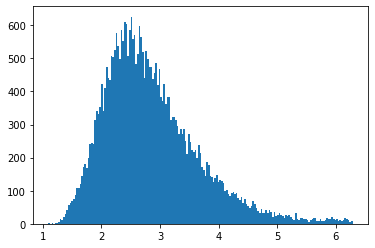

In [17]:
plot_durations_histogram(training_data)

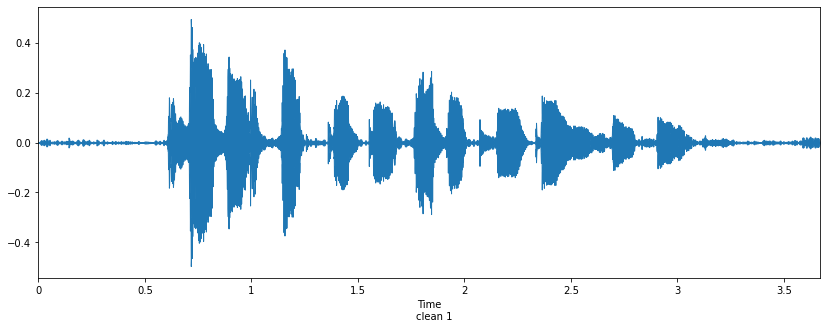

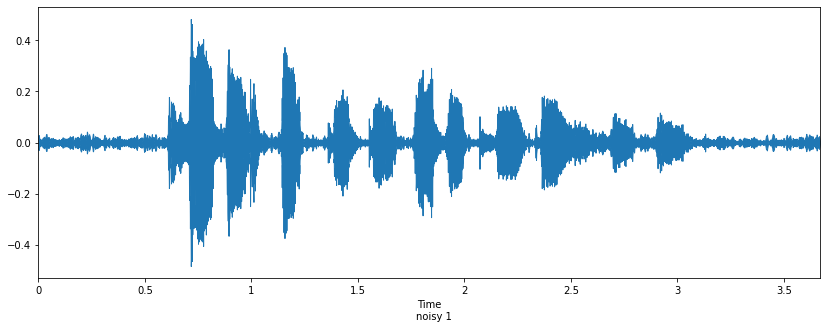

In [10]:
plot_waveforms([training_data[898]])

signal peak: 0.49579647183418274, noise peak: 0.038187168538570404, snr: 12.983325958251953
signal peak: 0.5074257850646973, noise peak: 0.0866687148809433, snr: 5.854774475097656
signal peak: 0.5003801584243774, noise peak: 0.059678517282009125, snr: 8.384593963623047
signal peak: 0.49827584624290466, noise peak: 0.4298631250858307, snr: 1.1591500043869019


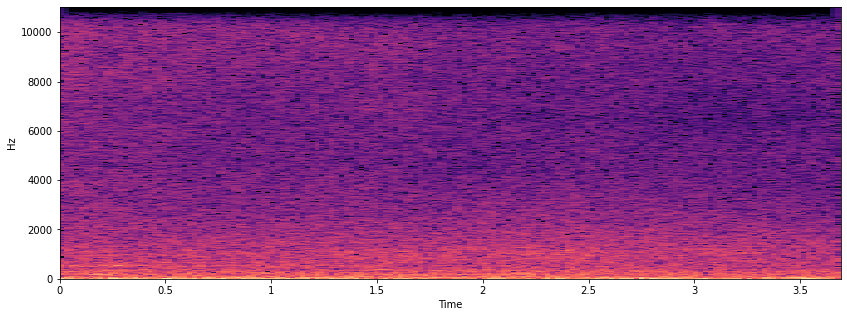

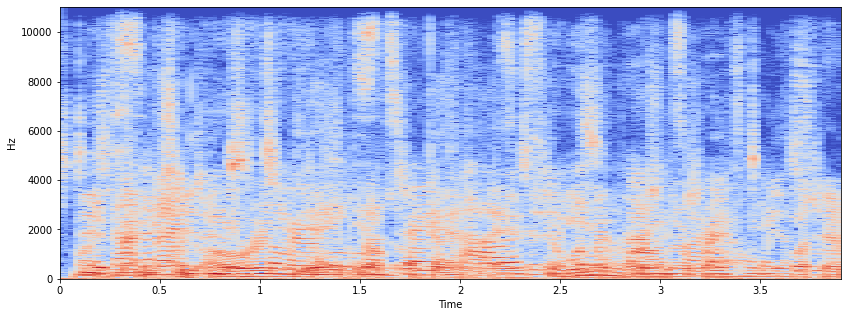

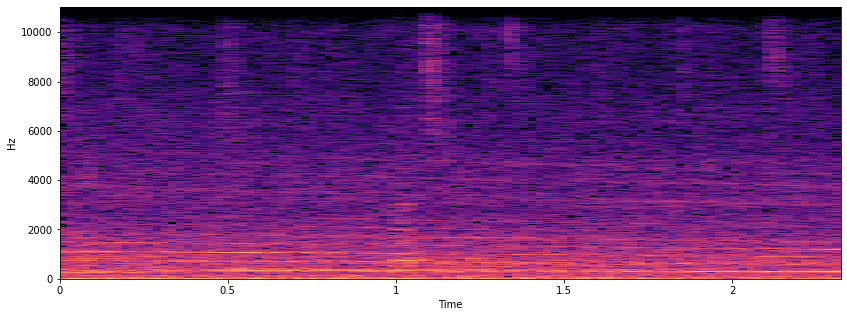

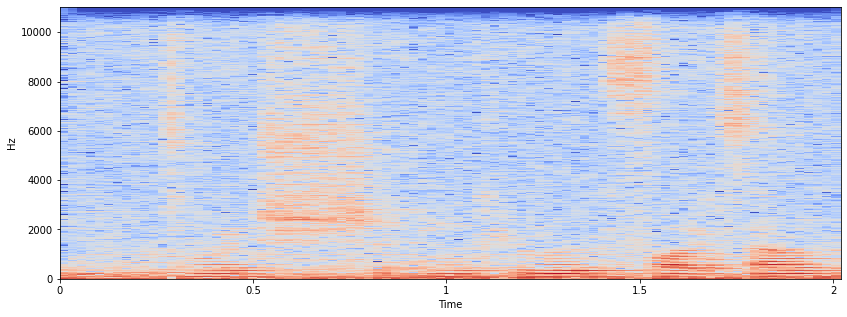

In [24]:
# A few spectrograms of noise.
plot_noise(training_data[898])
plot_noise(training_data[1])
plot_noise(training_data[100])
plot_noise(training_data[1001])